In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


xy= pd.read_csv('ADNI_adnimerge_20170629_QT-freeze.csv')

In [2]:
XY=xy[['RID', 'VISCODE'#,'AGE',       'PTGENDER', 'PTEDUCAT',         'APOE4'
       , 'FDG', 'PIB', 'AV45', 'ABETA', 'PTAU', 'TAU', 'CDRSB',
       'RAVLTimmediate', 'RAVLTlearning',
       'RAVLTforgetting', 'RAVLTpercforgetting', 'FAQ', 'MOCA', 'EcogPtMem',
       'EcogPtLang', 'EcogPtVisspat', 'EcogPtPlan', 'EcogPtOrgan',
       'EcogPtDivatt', 'EcogPtTotal', 'EcogSPMem', 'EcogSPLang',
       'EcogSPVisspat', 'EcogSPPlan', 'EcogSPOrgan', 'EcogSPDivatt',
       'EcogSPTotal',  'Ventricles', 'Hippocampus',
       'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV','MMSE','DX']]

xybl=xy[xy['VISCODE']=='bl']
dx=xybl['DX']

In [3]:
# Dropping values which are not meaningful
# ABETHA
XY['ABETA']=XY['ABETA'].replace('>1700',None)
XY['ABETA']=XY['ABETA'].replace('<200',None)

# PTAU
XY['PTAU']=XY['PTAU'].replace('>120',None)
XY['PTAU']=XY['PTAU'].replace('<8',None)
# TAU

XY['TAU']=XY['TAU'].replace('>1300',None)
XY['TAU']=XY['TAU'].replace('<80',None)

XY.shape


(12749, 38)

In [4]:
XY = XY.drop(XY[XY['Ventricles']==0].index)
XY = XY.dropna(subset=['DX'])

XY = XY.drop(XY[XY['DX']=='MCI to Dementia'].index)
XY = XY.drop(XY[XY['DX']=='NL to MCI'].index)
XY = XY.drop(XY[XY['DX']=='MCI to NL'].index)
XY = XY.drop(XY[XY['DX']=='Dementia to MCI'].index)
XY = XY.drop(XY[XY['DX']=='NL to Dementia'].index)
XY = XY.drop(XY[XY['MMSE'].isnull()].index)

# MMSE nan
# XY = XY.dropna(subset=['MMSE'])

# redefining value types which we deal with them in the above section
# ABETA
XY['ABETA']=(XY['ABETA'].astype(float))
XY = XY.infer_objects()
# PTAU
XY['PTAU']=(XY['PTAU'].astype(float))
# TAU
XY['TAU']=(XY['TAU'].astype(float))

XY=XY.set_index('RID',drop=False)

In [5]:
# le = preprocessing.LabelEncoder()
# gender_encoded=le.fit_transform(XY['PTGENDER'])
# XY=XY.drop(['PTGENDER'], axis=1)
# enc = OneHotEncoder(sparse=False)
# gender_encoded = gender_encoded.reshape(len(gender_encoded), 1)
# onehot_encoded = enc.fit_transform(gender_encoded)
# temp=pd.DataFrame(onehot_encoded)
# temp=temp.reset_index(drop=True)
# XY=XY.reset_index(drop=True)
# XY=pd.concat([XY, temp], axis=1,  join_axes=[ XY.index])

In [6]:
y1=XY[XY['VISCODE']=='bl'][['MMSE','RID']]
x1=XY[XY['VISCODE']=='bl']
# dx1=XY[XY['VISCODE']=='bl']['DX']
x1=x1.drop(['VISCODE','MMSE'], axis=1)
x1=x1.fillna(0)


In [7]:
y2=XY[XY['VISCODE']=='m06'][['MMSE','RID']]
x2=XY[XY['VISCODE']=='m06']
# dx2=XY[XY['VISCODE']=='m06']['DX']
x2=x2.drop(['VISCODE','MMSE'], axis=1)
x2=x2.fillna(0)
x2.columns


x2=x2.rename(index=str, columns ={'RID':'RID', 'FDG':'FDG_2', 'PIB':'PIB_2', 'AV45':'AV45_2', 'ABETA':'ABETA_2',
        'PTAU':'PTAU_2', 'TAU': 'TAU_2', 'CDRSB':'CDRSB_2',
       'RAVLTimmediate':'RAVLTimmediate_2', 'RAVLTlearning':'RAVLTlearning_2', 'RAVLTforgetting':'RAVLTforgetting_2',
       'RAVLTpercforgetting':'RAVLTpercforgetting_2', 'FAQ':'FAQ_2', 'MOCA':'MOCA_2',
       'EcogPtMem':'EcogPtMem_2', 'EcogPtLang':'EcogPtLang_2',
       'EcogPtVisspat':'EcogPtVisspat_2', 'EcogPtPlan': 'EcogPtPlan_2', 'EcogPtOrgan':'EcogPtOrgan_2', 'EcogPtDivatt':'EcogPtDivatt_2',
       'EcogPtTotal':'EcogPtTotal_2', 'EcogSPMem':'EcogSPMem_2', 'EcogSPLang':'EcogSPLang_2', 'EcogSPVisspat':'EcogSPVisspat_2', 'EcogSPPlan':'EcogSPPlan_2',
       'EcogSPOrgan':'EcogSPOrgan_2', 'EcogSPDivatt':'EcogSPDivatt_2', 'EcogSPTotal':'EcogSPTotal_2', 'Ventricles':'Ventricles_2',
       'Hippocampus':'Hippocampus_2', 'WholeBrain':'WholeBrain_2', 'Entorhinal':'Entorhinal_2', 'Fusiform':'Fusiform_2', 'MidTemp':'MidTemp_2',
       'ICV':'ICV_2','DX':'DX_2'})

In [8]:
y3=XY[XY['VISCODE']=='m12'][['MMSE','RID']]
x3=XY[XY['VISCODE']=='m12']
x3=x3.drop(['VISCODE','MMSE'], axis=1)
x3=x3.fillna(0)

x3=x3.rename(index=str, columns ={'RID':'RID', 'FDG':'FDG_3', 'PIB':'PIB_3', 'AV45':'AV45_3', 'ABETA':'ABETA_3',
        'PTAU':'PTAU_3', 'TAU': 'TAU_3', 'CDRSB':'CDRSB_3',
       'RAVLTimmediate':'RAVLTimmediate_3', 'RAVLTlearning':'RAVLTlearning_3', 'RAVLTforgetting':'RAVLTforgetting_3',
       'RAVLTpercforgetting':'RAVLTpercforgetting_3', 'FAQ':'FAQ_3', 'MOCA':'MOCA_3',
       'EcogPtMem':'EcogPtMem_3', 'EcogPtLang':'EcogPtLang_3',
       'EcogPtVisspat':'EcogPtVisspat_3', 'EcogPtPlan': 'EcogPtPlan_3', 'EcogPtOrgan':'EcogPtOrgan_3', 'EcogPtDivatt':'EcogPtDivatt_3',
       'EcogPtTotal':'EcogPtTotal_3', 'EcogSPMem':'EcogSPMem_3', 'EcogSPLang':'EcogSPLang_3', 'EcogSPVisspat':'EcogSPVisspat_3', 'EcogSPPlan':'EcogSPPlan_3',
       'EcogSPOrgan':'EcogSPOrgan_3', 'EcogSPDivatt':'EcogSPDivatt_3', 'EcogSPTotal':'EcogSPTotal_3', 'Ventricles':'Ventricles_3',
       'Hippocampus':'Hippocampus_3', 'WholeBrain':'WholeBrain_3', 'Entorhinal':'Entorhinal_3', 'Fusiform':'Fusiform_3', 'MidTemp':'MidTemp_3',
       'ICV':'ICV_3','DX':'DX_3'})

In [9]:
y4=XY[XY['VISCODE']=='m24'][['MMSE','RID']]
x4=XY[XY['VISCODE']=='m24']
x4=x4.drop(['VISCODE','MMSE'], axis=1)
x4=x4.fillna(0)

x4=x4.rename(index=str, columns ={'RID':'RID', 'FDG':'FDG_4', 'PIB':'PIB_4', 'AV45':'AV45_4', 'ABETA':'ABETA_4',
        'PTAU':'PTAU_4', 'TAU': 'TAU_4', 'CDRSB':'CDRSB_4',
       'RAVLTimmediate':'RAVLTimmediate_4', 'RAVLTlearning':'RAVLTlearning_4', 'RAVLTforgetting':'RAVLTforgetting_4',
       'RAVLTpercforgetting':'RAVLTpercforgetting_4', 'FAQ':'FAQ_4', 'MOCA':'MOCA_4',
       'EcogPtMem':'EcogPtMem_4', 'EcogPtLang':'EcogPtLang_4',
       'EcogPtVisspat':'EcogPtVisspat_4', 'EcogPtPlan': 'EcogPtPlan_4', 'EcogPtOrgan':'EcogPtOrgan_4', 'EcogPtDivatt':'EcogPtDivatt_4',
       'EcogPtTotal':'EcogPtTotal_4', 'EcogSPMem':'EcogSPMem_4', 'EcogSPLang':'EcogSPLang_4', 'EcogSPVisspat':'EcogSPVisspat_4', 'EcogSPPlan':'EcogSPPlan_4',
       'EcogSPOrgan':'EcogSPOrgan_4', 'EcogSPDivatt':'EcogSPDivatt_4', 'EcogSPTotal':'EcogSPTotal_4', 'Ventricles':'Ventricles_4',
       'Hippocampus':'Hippocampus_4', 'WholeBrain':'WholeBrain_4', 'Entorhinal':'Entorhinal_4', 'Fusiform':'Fusiform_4', 'MidTemp':'MidTemp_4',
       'ICV':'ICV_4','DX':'DX_4'})

In [10]:
y5=XY[XY['VISCODE']=='m36'][['MMSE','RID']]
x5=XY[XY['VISCODE']=='m36']
x5=x5.drop(['VISCODE','MMSE'], axis=1)
x5=x5.fillna(0)

x5=x5.rename(index=str, columns ={'RID':'RID', 'FDG':'FDG_5', 'PIB':'PIB_5', 'AV45':'AV45_5', 'ABETA':'ABETA_5',
        'PTAU':'PTAU_5', 'TAU': 'TAU_5', 'CDRSB':'CDRSB_5',
       'RAVLTimmediate':'RAVLTimmediate_5', 'RAVLTlearning':'RAVLTlearning_5', 'RAVLTforgetting':'RAVLTforgetting_5',
       'RAVLTpercforgetting':'RAVLTpercforgetting_5', 'FAQ':'FAQ_5', 'MOCA':'MOCA_5',
       'EcogPtMem':'EcogPtMem_5', 'EcogPtLang':'EcogPtLang_5',
       'EcogPtVisspat':'EcogPtVisspat_5', 'EcogPtPlan': 'EcogPtPlan_5', 'EcogPtOrgan':'EcogPtOrgan_5', 'EcogPtDivatt':'EcogPtDivatt_5',
       'EcogPtTotal':'EcogPtTotal_5', 'EcogSPMem':'EcogSPMem_5', 'EcogSPLang':'EcogSPLang_5', 'EcogSPVisspat':'EcogSPVisspat_5', 'EcogSPPlan':'EcogSPPlan_5',
       'EcogSPOrgan':'EcogSPOrgan_5', 'EcogSPDivatt':'EcogSPDivatt_5', 'EcogSPTotal':'EcogSPTotal_5', 'Ventricles':'Ventricles_5',
       'Hippocampus':'Hippocampus_5', 'WholeBrain':'WholeBrain_5', 'Entorhinal':'Entorhinal_5', 'Fusiform':'Fusiform_5', 'MidTemp':'MidTemp_5',
       'ICV':'ICV_5','DX':'DX_5'})

In [11]:
from functools import reduce
dfs = [x1,x2,x3]#,x4,x5
df_final = reduce(lambda left,right: pd.merge(left,right,on='RID',how='inner'), dfs)
# s=pd.merge(x1,x2,on='RID',how='inner')
# df_final=pd.merge(s,x3,on='RID',how='inner')

dfsy= [y3,y4,y5]#y1,y2
df_final_y = reduce(lambda left,right: pd.merge(left,right,on='RID',how='inner'), dfsy)
# s=pd.merge(y3,y4,on='RID',how='inner')
# df_final_y=pd.merge(s,y5,on='RID',how='inner')

DFXY= [x1,x2,x3,y3,y4,y5]
df_xy = reduce(lambda left,right: pd.merge(left,right,on='RID',how='inner'), DFXY)


In [12]:
df_xy.columns

Index(['RID', 'FDG', 'PIB', 'AV45', 'ABETA', 'PTAU', 'TAU', 'CDRSB',
       'RAVLTimmediate', 'RAVLTlearning',
       ...
       'Hippocampus_3', 'WholeBrain_3', 'Entorhinal_3', 'Fusiform_3',
       'MidTemp_3', 'ICV_3', 'DX_3', 'MMSE_x', 'MMSE_y', 'MMSE'],
      dtype='object', length=109)

In [13]:
df_xy_X=df_xy.iloc[:,0:-3]
df_xy_y=df_xy.iloc[:,-3:]

#split to train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_xy_X, df_xy_y, test_size=0.33, random_state=42)

In [14]:
# df_final['DX'].value_counts()

# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()

# df_final['DX']=le.fit_transform(df_final['DX'])
# # ventricle= df_final[['Ventricles']]#,'Ventricles_2','Ventricles_3','Ventricles_4','Ventricles_5']]


# df_final_y[df_final_y['MMSE'].isnull()==True]

# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# # scaler = StandardScaler(with_mean=False)


# # df_X =df_final.copy()
# # df_DX = df_X[['DX','DX_2','DX_3']]
# # df_X=df_X.drop(['DX','DX_2','DX_3'], axis=1)

# # df_X=scaler.fit_transform(df_X)
# # df_final_y=scaler.fit_transform(df_final_y)

# y =df_final['RAVLTimmediate']

# #         'PTAU':'PTAU_5', 'TAU': 'TAU_5', 'CDRSB':'CDRSB_5',
# #        'RAVLTimmediate':'RAVLTimmediate_5', 'RAVLTlearning':'RAVLTlearning_5', 'RAVLTforgetting':'RAVLTforgetting_5',
# #        'RAVLTpercforgetting':'RAVLTpercforgetting_5', 'FAQ':'FAQ_5', 'MOCA':'MOCA_5',
# #        'EcogPtMem':'EcogPtMem_5', 'EcogPtLang':'EcogPtLang_5',
# #        'EcogPtVisspat':'EcogPtVisspat_5', 'EcogPtPlan': 'EcogPtPlan_5', 'EcogPtOrgan':'EcogPtOrgan_5', 'EcogPtDivatt':'EcogPtDivatt_5',
# #        'EcogPtTotal':'EcogPtTotal_5', 'EcogSPMem':'EcogSPMem_5', 'EcogSPLang':'EcogSPLang_5', 'EcogSPVisspat':'EcogSPVisspat_5', 'EcogSPPlan':'EcogSPPlan_5',
# #        'EcogSPOrgan':'EcogSPOrgan_5', 'EcogSPDivatt':'EcogSPDivatt_5', 'EcogSPTotal':'EcogSPTotal_5', 'Ventricles':'Ventricles_5',
# #        'Hippocampus':'Hippocampus_5', 'WholeBrain':'WholeBrain_5', 'Entorhinal':'Entorhinal_5', 'Fusiform':'Fusiform_5', 'MidTemp':'MidTemp_5',
# #        'ICV':'ICV_5','DX':'DX_5'})

# # y=scaler.fit_transform(np.reshape(y,(-1,1)))
# # y=y[110:300]
# x = df_final['WholeBrain']#
# # x=x[110:300]
# colors = df_final['DX']
# # colors = colors.iloc[110:300]
# colors=colors+.15
# a =  df_final['CDRSB']
# area = a*20#.iloc[110:300]

# plt.scatter(x, y,s=area, c=colors, alpha=0.5)# 
# plt.show()

In [15]:
df_final=df_xy_X
df_final=df_final.drop(['DX','DX_2','DX_3'], axis=1)#,'DX_4','DX_5'

# X_train, X_test, y_train, y_test

X_train=X_train.drop(['DX','DX_2','DX_3'], axis=1)
X_test=X_test.drop(['DX','DX_2','DX_3'], axis=1)


In [16]:
# ventricle= df_final[['Ventricles','Ventricles_2','Ventricles_3','Ventricles_4','Ventricles_5']]
# ventricle2=ventricle[ventricle.Ventricles !=0]
# vetricle3=ventricle2[ventricle2.Ventricles.notnull()]

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = (scaler.fit_transform(X_train))
X_train_3d= np.asarray(X_train[0:-3,1:]).reshape((-1,3,34))


X_test = (scaler.fit_transform(X_test))
X_test_3d= np.asarray(X_test[:,1:]).reshape((-1,3,34))


y_train = (scaler.fit_transform(y_train))
y_train_3d= np.asarray(y_train[0:-3]).reshape((-1,3,1))

# X_val_3d = X_train_3d[0:53,:,:]
# X_train_3d= X_train_3d[53:,:,:]

# y_val_3d = y_train_3d[0:53,:,:]
# y_train_3d = y_train_3d[53:,:,:]


y_test = (scaler.fit_transform(y_test))
y_test_3d= np.asarray(y_test).reshape((-1,3,1))

In [18]:
y_test_3d.shape

(175, 3, 1)

## LSTM

In [19]:
# Example of one output for each input time step
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, GRU,Bidirectional
from numpy import array
from keras.layers import TimeDistributed
# define model where LSTM is also output layer
model = Sequential()#Bidirectional
model.add(LSTM(5,activation='relu', return_sequences=True, input_shape=(3,34)))#,stateful=True , batch_input_shape = (10,3,34)
# model.add(LSTM(30,activation='relu', return_sequences=True, input_shape=(3,34)))
model.add(LSTM(3,activation='linear', return_sequences=True, input_shape=(3,34)))
model.add(Dropout(0.2))
# model.add(TimeDistributed(Dense(1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network, validation_data=(X_train_3d, y_train_3d)
history = model.fit(X_train_3d, y_train_3d, epochs=150, validation_split=0.3,
                    batch_size=10, verbose=0, shuffle=True)
# plot history
import matplotlib.pyplot as pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()



# X_test_3d = X_train_3d
# y_test_3d = y_train_3d

y_dim1,y_dim2,y_dim3 = y_test_3d.shape
y_test_2d= np.asarray(y_test_3d).reshape((y_dim1, y_dim2))
y_test_2i = scaler.inverse_transform(y_test_2d)
yhat = model.predict(X_test_3d)
yhat_2= np.asarray(yhat).reshape((y_dim1, y_dim2))
yhat_2_i = scaler.inverse_transform(yhat_2)

import math
from sklearn.metrics import r2_score
from scipy.stats.stats import pearsonr
print("Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test_2i[:,0], yhat_2_i[:,0])))
print("Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test_2i[:,1], yhat_2_i[:,1])))
print("Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test_2i[:,2], yhat_2_i[:,2])))
print("Mean squared error: %.2f" % mean_squared_error(y_test_2i, yhat_2_i))


Using TensorFlow backend.


<Figure size 640x480 with 1 Axes>

Mean squared error: 1.89
Mean squared error: 2.15
Mean squared error: 2.02
Mean squared error: 4.08


In [20]:
# Explained variance score: 1 is perfect prediction
[T1,R1]=pearsonr(y_test_2i[:,0], yhat_2_i[:,0])
[T2,R2]=pearsonr(y_test_2i[:,1], yhat_2_i[:,1])
[T3,R3]=pearsonr(y_test_2i[:,2], yhat_2_i[:,2])
print( T1,T2,T3)


0.4781647387938248 0.6058724889777654 0.6957159559637324


## GRU


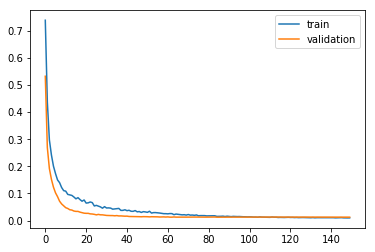

Mean squared error: 1.87
Mean squared error: 2.18
Mean squared error: 2.01
Mean squared error: 4.10
0.4296291106309007 0.5504945708598379 0.6208336505470233


In [21]:
# Example of one output for each input time step
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, GRU,Bidirectional
from numpy import array
from keras.layers import TimeDistributed
# define model where LSTM is also output layer
model = Sequential()#Bidirectional
model.add(GRU(5,activation='relu', return_sequences=True, input_shape=(3,34)))#,stateful=True , batch_input_shape = (10,3,34)
# model.add(LSTM(30,activation='relu', return_sequences=True, input_shape=(3,34)))
model.add(GRU(3,activation='linear', return_sequences=True, input_shape=(3,34)))
model.add(Dropout(0.2))
# model.add(TimeDistributed(Dense(1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network, validation_data=(X_train_3d, y_train_3d)
history = model.fit(X_train_3d, y_train_3d, epochs=150, validation_split=0.3,
                    batch_size=10, verbose=0, shuffle=True)
# plot history
import matplotlib.pyplot as pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()


# X_test_3d = X_train_3d
# y_test_3d = y_train_3d

y_dim1,y_dim2,y_dim3 = y_test_3d.shape
y_test_2d= np.asarray(y_test_3d).reshape((y_dim1, y_dim2))
y_test_2i = scaler.inverse_transform(y_test_2d)
yhat = model.predict(X_test_3d)
yhat_2= np.asarray(yhat).reshape((y_dim1, y_dim2))
yhat_2_i = scaler.inverse_transform(yhat_2)

import math
from sklearn.metrics import r2_score
print("Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test_2i[:,0], yhat_2_i[:,0])))
print("Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test_2i[:,1], yhat_2_i[:,1])))
print("Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test_2i[:,2], yhat_2_i[:,2])))
print("Mean squared error: %.2f" % mean_squared_error(y_test_2i, yhat_2_i))
# Explained variance score: 1 is perfect prediction
# Explained variance score: 1 is perfect prediction
[T1,R1]=pearsonr(y_test_2i[:,0], yhat_2_i[:,0])
[T2,R2]=pearsonr(y_test_2i[:,1], yhat_2_i[:,1])
[T3,R3]=pearsonr(y_test_2i[:,2], yhat_2_i[:,2])
print( T1,T2,T3)

#### Linear Regression

(175,)
(175,)
(175,)
Mean squared error: 1.66
Mean squared error: 2.01
Mean squared error: 1.91
Test RMSE on first future time point: 1.867
0.5275615968104042 0.5575256450710719 0.6500100705801286


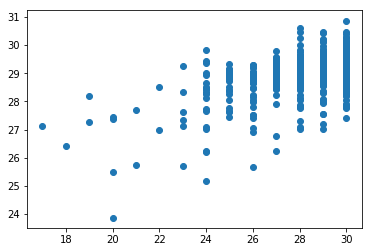

In [26]:
import matplotlib.pyplot as plt
plt.scatter(y_test_2i,yhat_2_i)

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
# Create linear regression object
# regr = linear_model.LinearRegression()
regr =Ridge(alpha=1.0)
regr.fit(X_train, y_train[:,0])

# Make predictions using the testing set
y_pred = regr.predict(X_test)
y_pred1= np.asarray(y_pred).reshape((-1,1))
print(y_pred.shape)

# Make predictions using the testing set
regr.fit(X_train, y_train[:,1])
y_pred = regr.predict(X_test)
y_pred2= np.asarray(y_pred).reshape((-1,1))
print(y_pred.shape)

# Make predictions using the testing set
regr.fit(X_train, y_train[:,2])
y_pred = regr.predict(X_test)
y_pred3= np.asarray(y_pred).reshape((-1,1))
print(y_pred.shape)


y_pred = np.append(y_pred1,y_pred2, axis=1)
y_pred = np.append(y_pred,y_pred3, axis=1)



y_pred_i = scaler.inverse_transform(y_pred)
y_test_i = scaler.inverse_transform(y_test)
print("Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test_i[:,0], y_pred_i[:,0])))
print("Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test_i[:,1], y_pred_i[:,1])))
print("Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test_i[:,2], y_pred_i[:,2])))
rmse = math.sqrt(mean_squared_error(y_test_i, y_pred_i))
print('Test RMSE on first future time point: %.3f' % rmse)
# Explained variance score: 1 is perfect prediction
[T1,R1]=pearsonr(y_test_i[:,0], y_pred_i[:,0])
[T2,R2]=pearsonr(y_test_i[:,1], y_pred_i[:,1])
[T3,R3]=pearsonr(y_test_i[:,2], y_pred_i[:,2])
print( T1,T2,T3)

In [28]:
from sklearn.svm import SVR
# Fit svr_rbfession model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X_train, y_train[:,0])

# Make predictions using the testing set
y_pred = svr_rbf.predict(X_test)
y_pred1= np.asarray(y_pred).reshape((-1,1))
# Make predictions using the testing set
svr_rbf.fit(X_train, y_train[:,1])
y_pred = svr_rbf.predict(X_test)
y_pred2= np.asarray(y_pred).reshape((-1,1))
# Make predictions using the testing set
svr_rbf.fit(X_train, y_train[:,2])
y_pred = svr_rbf.predict(X_test)
y_pred3= np.asarray(y_pred).reshape((-1,1))
y_pred = np.append(y_pred1,y_pred2, axis=1)
y_pred = np.append(y_pred,y_pred3, axis=1)
y_pred_i = scaler.inverse_transform(y_pred)
y_test_i = scaler.inverse_transform(y_test)
print("Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test_i[:,0], y_pred_i[:,0])))
print("Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test_i[:,1], y_pred_i[:,1])))
print("Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test_i[:,2], y_pred_i[:,2])))
print("Mean squared error: %.2f" % mean_squared_error(y_test_i, y_pred_i))
# Explained variance score: 1 is perfect prediction
[T1,R1]=pearsonr(y_test_i[:,0], y_pred_i[:,0])
[T2,R2]=pearsonr(y_test_i[:,1], y_pred_i[:,1])
[T3,R3]=pearsonr(y_test_i[:,2], y_pred_i[:,2])
print( T1,T2,T3)

Mean squared error: 1.75
Mean squared error: 2.01
Mean squared error: 2.10
Mean squared error: 3.83


In [24]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import median_absolute_error, r2_score
# from sklearn.compose import TransformedTargetRegressor
# f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

# y_test=y_test_i[:,0]
# y_pred=y_pred_i[:,0]
# ax0.scatter(y_test, y_pred)
# ax0.plot([0, 10], [0, 10], '--k')
# ax0.set_ylabel('Target predicted')
# ax0.set_xlabel('True Target')
# ax0.set_title('Ridge regression \n without target transformation')
# ax0.text(1, 9, r'$R^2$=%.2f, MAE=%.2f' % (
#     r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)))
# ax0.set_xlim([0, 10])
# ax0.set_ylim([0, 10])

# regr_trans = TransformedTargetRegressor(
#     regressor=RidgeCV(),
#     transformer=QuantileTransformer(output_distribution='normal'))
# regr_trans.fit(X_train, y_train)
# y_pred = regr_trans.predict(X_test)

# ax1.scatter(y_test, y_pred)
# ax1.plot([0, 10], [0, 10], '--k')
# ax1.set_ylabel('Target predicted')
# ax1.set_xlabel('True Target')
# ax1.set_title('Ridge regression \n with target transformation')
# ax1.text(1, 9, r'$R^2$=%.2f, MAE=%.2f' % (
#     r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)))
# ax1.set_xlim([0, 10])
# ax1.set_ylim([0, 10])

# f.suptitle("Boston housing data: distance to employment centers", y=0.035)
# f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

# plt.show()